# 수원시 주차 문제 해결 및 공영주차장 설립 제안

## 분석에 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm

## 데이터셋 저장

In [17]:
df = pd.read_csv("데이터프레임_수정_v02.csv", index_col = False)

In [16]:
df.set_index("구·동", inplace = True)

In [23]:
df = df.drop(df.columns[13:20], axis=1)

In [25]:
df

,생활 인구,소매업,의료기관,교육기관,서비스업,음식점,유입인구,카드소비,지역면적(km^2),버스정류장수,근린생활시설수,추정 차량등록수,적정 주차면수
0,25225,246,27,46,193,288,19726,21855,8.63,67,990,9898,4300.89
1,42518,278,36,147,349,512,32824,17442,3.14,68,1417,16683,4771.24
2,27789,142,26,106,137,150,14619,7453,1.28,24,496,10904,2183.23
3,38198,254,31,89,234,304,21120,49304,1.44,25,922,14988,3543.11
4,20217,297,36,35,329,496,23052,17070,1.27,31,1573,7933,5774.77
5,18765,201,24,48,202,348,15036,11396,1.65,18,938,7363,4226.00
6,28924,247,23,71,204,282,21708,11353,1.84,30,913,11349,3825.68
7,18403,200,20,25,133,275,14948,5482,11.58,35,736,7221,3551.13
8,39850,265,76,344,252,346,30098,25033,1.44,49,1061,15637,4162.07
9,17756,153,34,59,75,73,11830,10585,1.29,10,373,6967,1772.25


## 변수 간 상관관계 파악

In [88]:
corr = df.corr()

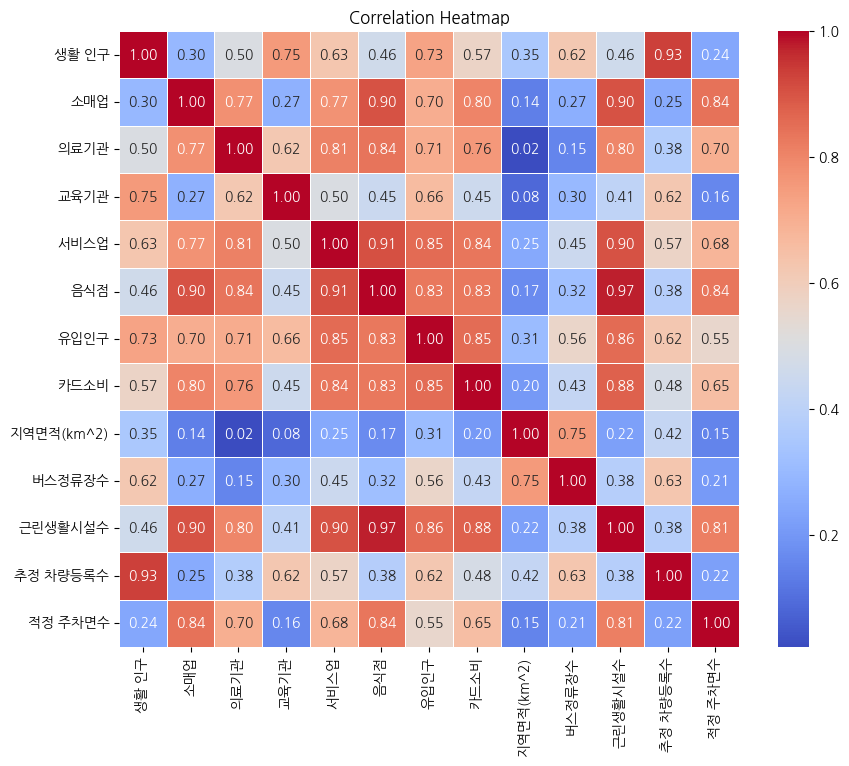

In [90]:
plt.figure(figsize=(10, 8))  # 그래프 크기 조정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
from scipy.stats import pearsonr, spearmanr

## 간단한 EDA

In [92]:
X = df[['생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '카드소비', '지역면적(km^2)', '버스정류장수', '근린생활시설수', '추정 차량등록수']]
y = df[['적정 주차면수']]

In [94]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   생활 인구       44 non-null     int64  
 1   소매업         44 non-null     int64  
 2   의료기관        44 non-null     int64  
 3   교육기관        44 non-null     int64  
 4   서비스업        44 non-null     int64  
 5   음식점         44 non-null     int64  
 6   유입인구        44 non-null     int64  
 7   카드소비        44 non-null     int64  
 8   지역면적(km^2)  44 non-null     float64
 9   버스정류장수      44 non-null     int64  
 10  근린생활시설수     44 non-null     int64  
 11  추정 차량등록수    44 non-null     int64  
 12  적정 주차면수     44 non-null     float64
dtypes: float64(2), int64(11)
memory usage: 4.6 KB


생활 인구         0
소매업           0
의료기관          0
교육기관          0
서비스업          0
음식점           0
유입인구          0
카드소비          0
지역면적(km^2)    0
버스정류장수        0
근린생활시설수       0
추정 차량등록수      0
적정 주차면수       0
dtype: int64

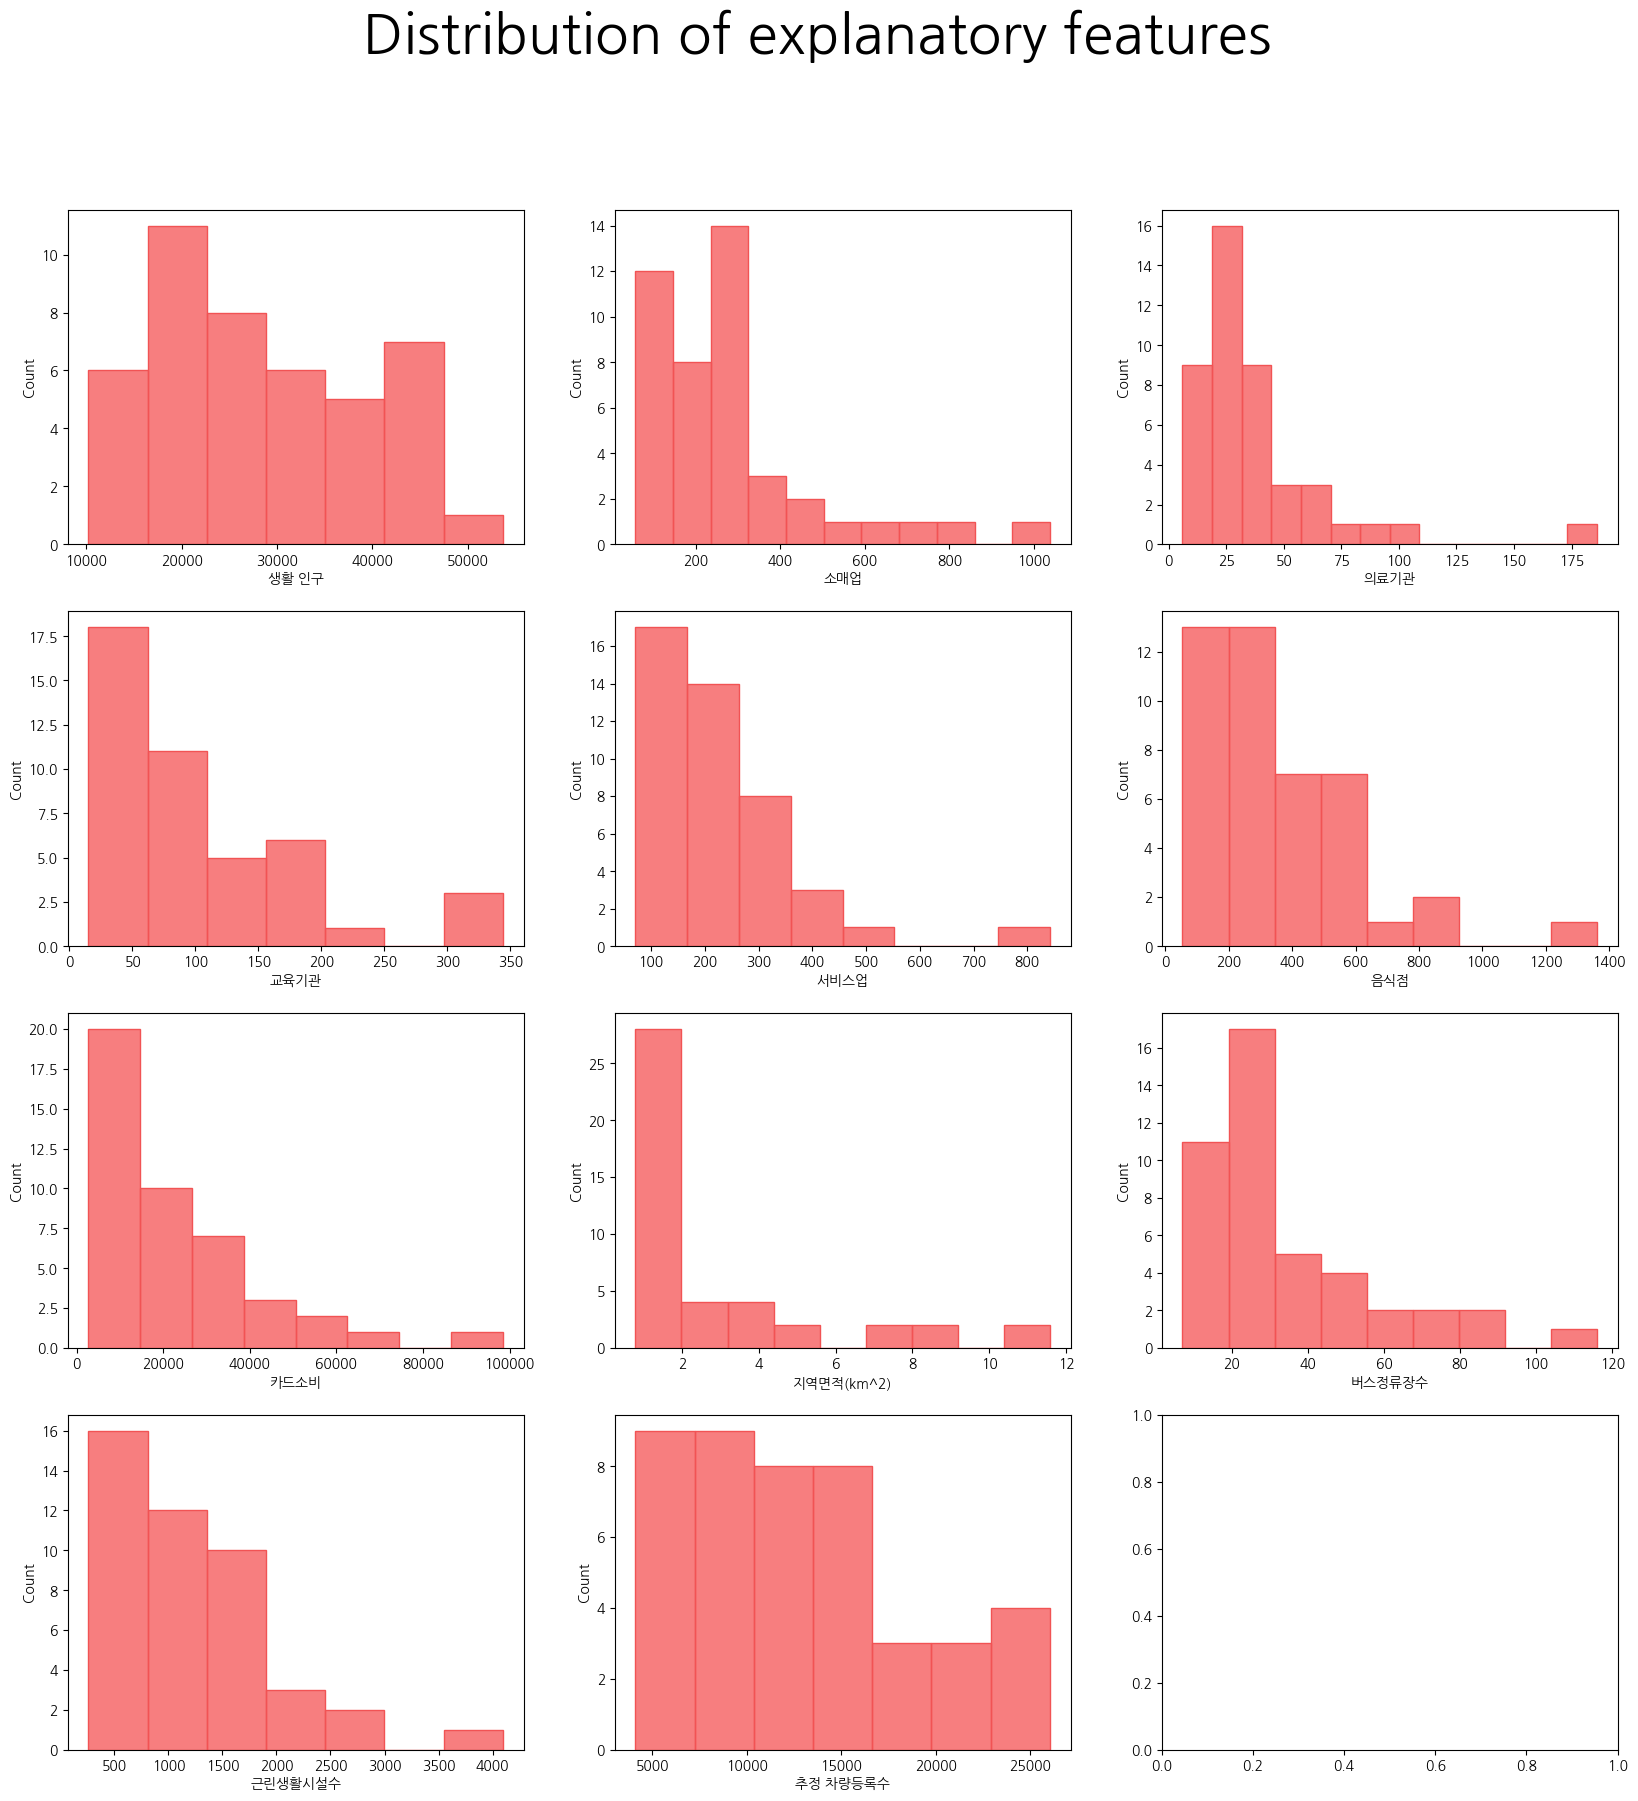

In [98]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('Distribution of explanatory features', fontsize=40)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),X):
    sns.histplot(data = df, x = feature, ax=ax, color='#f55354', edgecolor='#f15354')
plt.show()

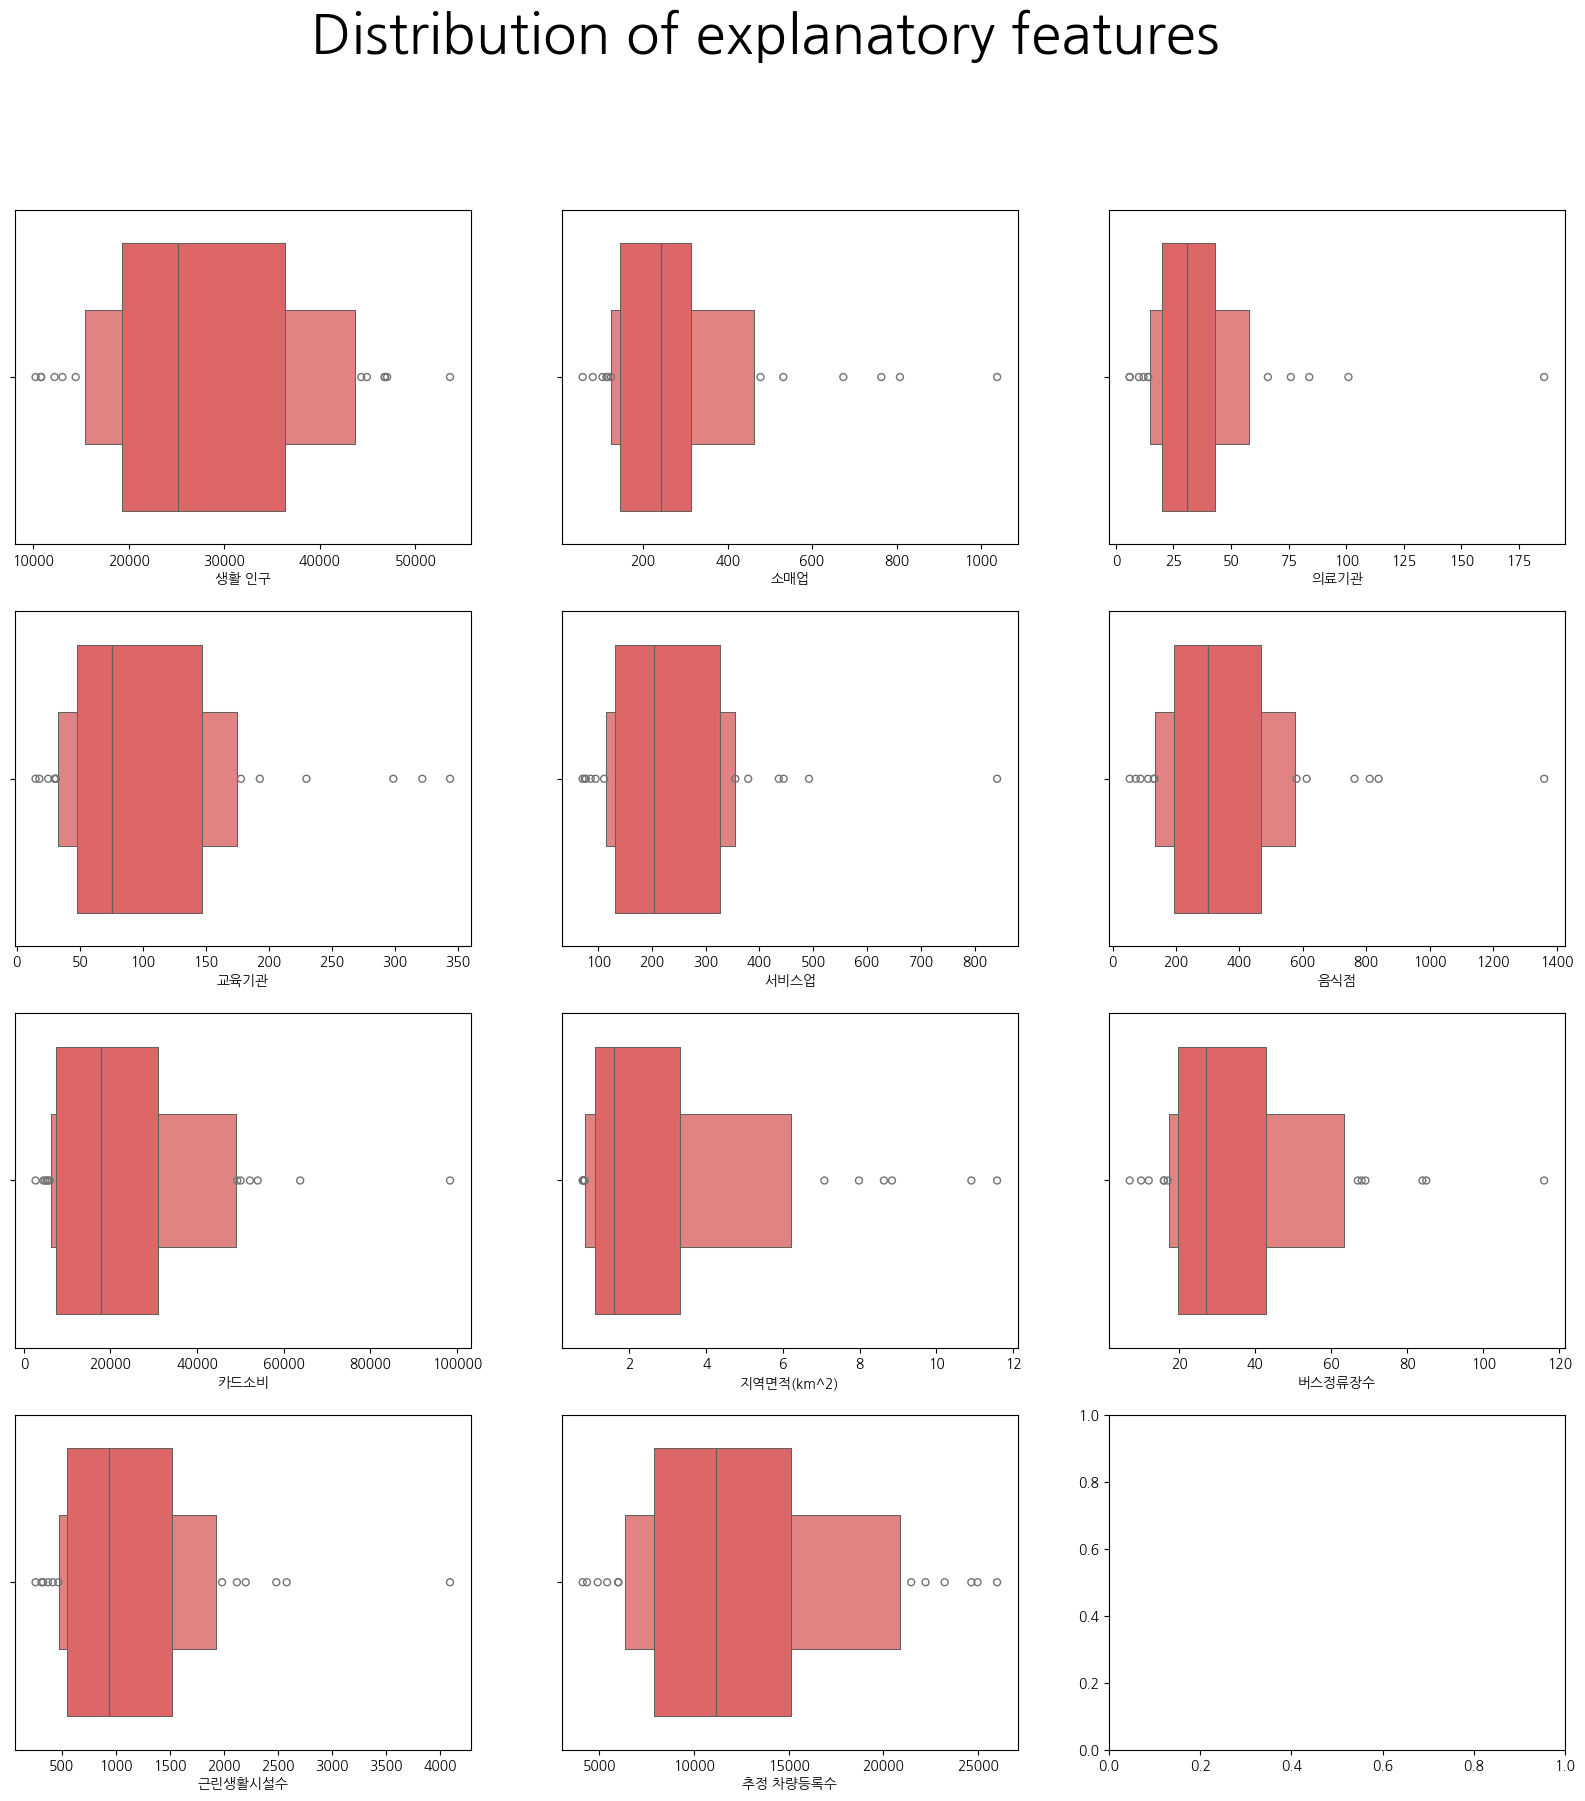

In [100]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('Distribution of explanatory features', fontsize=40)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),X):
    sns.boxenplot(data = df, x = feature, ax=ax, color='#f15354')
plt.show()

## Scailing of Dataset

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include='number')), 
                         columns=df.select_dtypes(include='number').columns)

In [29]:
scaled_df

,생활 인구,소매업,의료기관,교육기관,서비스업,음식점,유입인구,카드소비,지역면적(km^2),버스정류장수,근린생활시설수,추정 차량등록수,적정 주차면수
0,-0.246263,-0.200686,-0.355889,-0.713626,-0.286672,-0.284194,-0.334541,-0.053411,2.082499,1.432155,-0.206373,-0.461975,-0.224095
1,1.270684,-0.041673,-0.058564,0.561546,0.808329,0.623165,0.732829,-0.280420,0.109296,1.476815,0.359826,0.686079,-0.139288
2,-0.021348,-0.717476,-0.388925,0.043902,-0.679749,-0.843193,-0.750716,-0.794264,-0.559221,-0.488212,-0.861413,-0.291755,-0.605923
3,0.891733,-0.160932,-0.223745,-0.170731,0.001117,-0.219383,-0.220943,1.358593,-0.501714,-0.443552,-0.296540,0.399277,-0.360728
4,-0.685566,0.052741,-0.058564,-0.852506,0.667944,0.558354,-0.063502,-0.299556,-0.562816,-0.175594,0.566681,-0.794463,0.041655
5,-0.812936,-0.424297,-0.454998,-0.688375,-0.223499,-0.041152,-0.716735,-0.591432,-0.426237,-0.756170,-0.275324,-0.890910,-0.237599
6,0.078215,-0.195716,-0.488034,-0.397989,-0.209460,-0.308499,-0.173026,-0.593644,-0.357947,-0.220253,-0.308474,-0.216459,-0.309779
7,-0.844691,-0.429266,-0.587142,-0.978761,-0.707826,-0.336854,-0.723906,-0.895654,3.142781,0.003045,-0.543175,-0.914937,-0.359282
8,1.036646,-0.106272,1.262881,3.048763,0.127463,-0.049253,0.510684,0.110069,-0.501714,0.628281,-0.112227,0.509091,-0.249126
9,-0.901446,-0.662816,-0.124636,-0.549495,-1.114942,-1.155098,-0.977995,-0.633151,-0.555627,-1.113447,-1.024510,-0.957915,-0.680026


# Linear Regression

In [33]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 분리
X = scaled_df[['생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '카드소비', '지역면적(km^2)', '버스정류장수', '근린생활시설수', '추정 차량등록수']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = scaled_df[['적정 주차면수']]  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                적정 주차면수   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     15.41
Date:                Tue, 13 May 2025   Prob (F-statistic):           8.01e-10
Time:                        19:08:16   Log-Likelihood:                -21.954
No. Observations:                  44   AIC:                             67.91
Df Residuals:                      32   BIC:                             89.32
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.551e-17      0.070   7.88e-16      1.0

In [35]:
from sklearn.metrics import mean_squared_error

# 예측값
y_pred = model.predict(X)

# 실제값: y
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 0.1588240425570939


In [85]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# K-Fold 설정 (예: 5-fold)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 교차검증 수행 (neg_mean_squared_error로 성능 측정)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# 결과 출력
print("각 Fold의 MSE (음수값은 절댓값으로 변환):", -scores)
print("평균 MSE:", -np.mean(scores))

C:\Users\usr\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\usr\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\usr\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\usr\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

각 Fold의 MSE (음수값은 절댓값으로 변환): [1.60621421e+00 1.63746542e-02 2.57568077e+00 2.35465456e-02
 1.98640150e-03 2.62283968e-03 5.71246832e-02 1.92419005e-02
 1.74510873e-02 1.22880870e-01]
평균 MSE: 0.4443123961655582


## Ridge Model

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [83]:
# Ridge 모델 생성 및 학습 (alpha는 정규화 강도, 보통 0.1~10 사이 시도)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# 예측
model = RandomForestRegressor()

# MSE 및 RMSE 계산
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Ridge 회귀 결과")
print("-" * 20)
print("회귀 계수:", ridge_model.coef_)
print("절편:", ridge_model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)

Ridge 회귀 결과
--------------------
회귀 계수: [[ 0.         -0.01035898  0.20095714  0.41655146 -0.39184349 -0.41034479
   0.61488046 -0.17157989  0.01366875  0.01379485  0.28747567  0.22219643]]
절편: [1.81994469e-16]
MSE: 0.1691793427091774
RMSE: 0.41131416546136285


## Lasso Model

In [74]:
from sklearn.linear_model import Lasso

# Lasso 모델 생성 및 학습 (alpha는 정규화 강도)
lasso_model = Lasso(alpha=0.1)  # alpha 값은 0.01, 0.1, 1.0 등 다양하게 실험 가능
lasso_model.fit(X, y)

# 예측
y_pred = lasso_model.predict(X)

# MSE 및 RMSE 계산
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print("Lasso 회귀 결과")
print("-" * 20)
print("회귀 계수:", lasso_model.coef_)
print("절편:", lasso_model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)

Lasso 회귀 결과
--------------------
회귀 계수: [ 0.         -0.          0.40424537  0.         -0.0216676   0.
  0.37962048 -0.          0.          0.        ]
절편: [6.59223444e-17]
MSE: 0.26571142661013347
RMSE: 0.5154720425106811


## Non-linear Regression

In [79]:
# 독립 변수와 종속 변수 분리
X = df[['생활 인구']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     5.443
Date:                Thu, 17 Apr 2025   Prob (F-statistic):             0.0246
Time:                        14:07:25   Log-Likelihood:                -419.45
No. Observations:                  43   AIC:                             842.9
Df Residuals:                      41   BIC:                             846.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2847.0569   1736.991      1.639      0.1

In [81]:
# 독립 변수와 종속 변수 분리
X = df[['소매업']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     47.96
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           2.10e-08
Time:                        14:07:36   Log-Likelihood:                -405.47
No. Observations:                  43   AIC:                             814.9
Df Residuals:                      41   BIC:                             818.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1366.5061    890.676      1.534      0.1

In [83]:
# 독립 변수와 종속 변수 분리
X = df[['의료기관']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     14.24
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           0.000510
Time:                        14:07:53   Log-Likelihood:                -415.72
No. Observations:                  43   AIC:                             835.4
Df Residuals:                      41   BIC:                             839.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2805.6982   1170.326      2.397      0.0

In [85]:
# 독립 변수와 종속 변수 분리
X = df[['교육기관']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.688
Date:                Thu, 17 Apr 2025   Prob (F-statistic):             0.0618
Time:                        14:08:04   Log-Likelihood:                -420.28
No. Observations:                  43   AIC:                             844.6
Df Residuals:                      41   BIC:                             848.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4982.9601   1073.804      4.640      0.0

In [87]:
# 독립 변수와 종속 변수 분리
X = df[['서비스업']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     45.23
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           4.03e-08
Time:                        14:08:16   Log-Likelihood:                -406.14
No. Observations:                  43   AIC:                             816.3
Df Residuals:                      41   BIC:                             819.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.2224   1072.256      0.138      0.8

In [89]:
# 독립 변수와 종속 변수 분리
X = df[['음식점']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     62.91
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           8.25e-10
Time:                        14:08:26   Log-Likelihood:                -402.14
No. Observations:                  43   AIC:                             808.3
Df Residuals:                      41   BIC:                             811.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        705.3703    861.763      0.819      0.4

In [91]:
# 독립 변수와 종속 변수 분리
X = df[['유입인구']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     27.86
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           4.56e-06
Time:                        14:08:36   Log-Likelihood:                -410.98
No. Observations:                  43   AIC:                             826.0
Df Residuals:                      41   BIC:                             829.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        845.3648   1214.966      0.696      0.4

In [93]:
# 독립 변수와 종속 변수 분리
X = df[['카드소비']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     20.64
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           4.82e-05
Time:                        14:08:45   Log-Likelihood:                -413.36
No. Observations:                  43   AIC:                             830.7
Df Residuals:                      41   BIC:                             834.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3176.5442    942.736      3.369      0.0

In [95]:
# 독립 변수와 종속 변수 분리
X = df[['지역면적(km^2)']]  # 독립 변수들: , '생활 인구', '소매업', '의료기관', '교육기관', '서비스업', '음식점', '유입인구', '카드소비', '지역면적(km^2)'
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.969
Date:                Thu, 17 Apr 2025   Prob (F-statistic):             0.0530
Time:                        14:08:55   Log-Likelihood:                -420.14
No. Observations:                  43   AIC:                             844.3
Df Residuals:                      41   BIC:                             847.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5275.9969    939.277      5.617      0.0

In [97]:
# 독립 변수와 종속 변수 분리
X = df[['주차면수 합', '생활 인구', '소매업', '의료기관', '서비스업', '음식점', '유입인구', '카드소비']]
y = df['단속건수']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   단속건수   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     12.31
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           4.52e-08
Time:                        14:13:40   Log-Likelihood:                -392.89
No. Observations:                  43   AIC:                             803.8
Df Residuals:                      34   BIC:                             819.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.8438   1224.459     -0.705      0.4

## 단순 선형 회귀를 통해 제거된 데이터셋

In [99]:
df_1 = df.drop(['교육기관', '지역면적(km^2)'], axis = 1)

## 변수 선택

In [121]:
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)  # 상수항 추가
    while True:
        model = sm.OLS(y, X).fit()
        max_pval = model.pvalues.max()
        if max_pval > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"제거 변수: {excluded_feature} (p={max_pval:.4f})")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model

# 예시 사용
X = df_1.drop(columns=['단속건수'])
y = df_1['단속건수']
model = backward_elimination(X, y)
print(model.summary())


제거 변수: 의료기관 (p=0.8676)
제거 변수: 생활 인구 (p=0.4985)
제거 변수: 유입인구 (p=0.5625)
제거 변수: 카드소비 (p=0.6311)
제거 변수: 음식점 (p=0.3358)
제거 변수: const (p=0.4036)
제거 변수: 소매업 (p=0.4280)
                                 OLS Regression Results                                
Dep. Variable:                   단속건수   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              214.4
Date:                Thu, 17 Apr 2025   Prob (F-statistic):                    1.93e-22
Time:                        14:25:21   Log-Likelihood:                         -394.79
No. Observations:                  43   AIC:                                      793.6
Df Residuals:                      41   BIC:                                      797.1
Df Model:                           2                                                  
Covariance Type:            nonrobust          

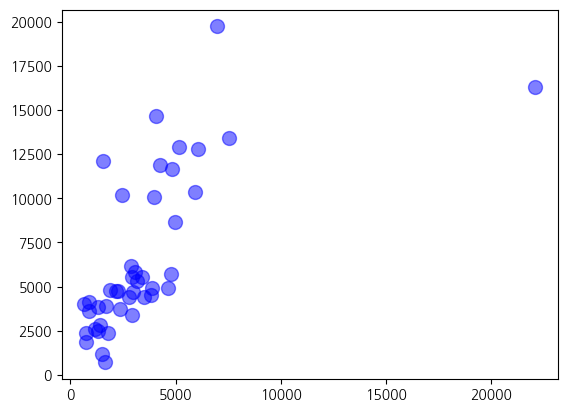

In [129]:


plt.plot('주차면수 합',
         '단속건수',
         data=df_1,
        linestyle='none',
        marker='o',
        markersize=10,
        color='blue',
        alpha=0.5)

plt.show()

In [21]:
geo = gpd.read_file("emd.shp")  # 행정동 경계 GeoJSON

In [121]:
# 2. 회귀모형 적합
X = df[['주차면수 합', '생활 인구', '소매업', '의료기관', '서비스업', '음식점', '유입인구', '카드소비']]
X = sm.add_constant(X)
y = df['단속건수']
model = sm.OLS(y, X).fit()

In [123]:
# 3. 예측값과 잔차 계산
df['예측값'] = model.predict(X)
df['잔차'] = df['단속건수'] - df['예측값']

In [125]:
df

,주차면수 합,생활 인구,소매업,의료기관,교육기관,서비스업,음식점,유입인구,카드소비,지역면적(km^2),단속건수,예측값,잔차
구·동,,,,,,,,,,,,,
파장동,3515,25225,246,27,46,193,288,19726,21855,8.63,4410,6149.714506,-1739.714506
율천동,3880,42518,278,36,147,349,512,32824,17442,3.14,4928,7953.680836,-3025.680836
정자1동,1764,27789,142,26,106,137,150,14619,7453,1.28,2345,1954.159917,390.840083
정자2동,2946,38198,254,31,89,234,304,21120,49304,1.44,3380,11467.659154,-8087.659154
영화동,4781,20217,297,36,35,329,496,23052,17070,1.27,5728,14405.427539,-8677.427539
송죽동,3189,18765,201,24,48,202,348,15036,11396,1.65,5294,7022.603650,-1728.603650
조원1동,2953,28924,247,23,71,204,282,21708,11353,1.84,4713,2636.491654,2076.508346
연무동,2790,18403,200,20,25,133,275,14948,5482,11.58,4431,1097.053126,3333.946874
정자3동,2903,39850,265,76,344,252,346,30098,25033,1.44,6175,12761.470186,-6586.470186


In [127]:
demand_hotspots = df[df["잔차"] > 0].copy()

,주차면수 합,생활 인구,소매업,의료기관,교육기관,서비스업,음식점,유입인구,카드소비,지역면적(km^2),단속건수,예측값,잔차
구·동,,,,,,,,,,,,,
정자1동,1764,27789,142,26,106,137,150,14619,7453,1.28,2345,1954.159917,390.840083
조원1동,2953,28924,247,23,71,204,282,21708,11353,1.84,4713,2636.491654,2076.508346
연무동,2790,18403,200,20,25,133,275,14948,5482,11.58,4431,1097.053126,3333.946874
세류1동,752,10809,57,12,30,86,54,9189,2693,0.93,1876,172.558216,1703.441784
서둔동,7545,38639,532,38,76,318,399,34727,50074,8.84,13436,13016.122924,419.877076
권선1동,4087,24773,438,37,67,379,560,37583,31349,1.03,14632,12141.789533,2490.210467
곡선동,6990,35723,296,39,147,354,444,25418,23712,4.46,19730,15790.561385,3939.438615
입북동,763,19796,81,6,65,77,88,11771,4903,7.08,2368,-3776.798055,6144.798055
호매실동,2440,44953,190,28,130,217,336,25068,18101,4.74,10203,1632.877327,8570.122673


In [131]:
corr = demand_hotspots.corr()

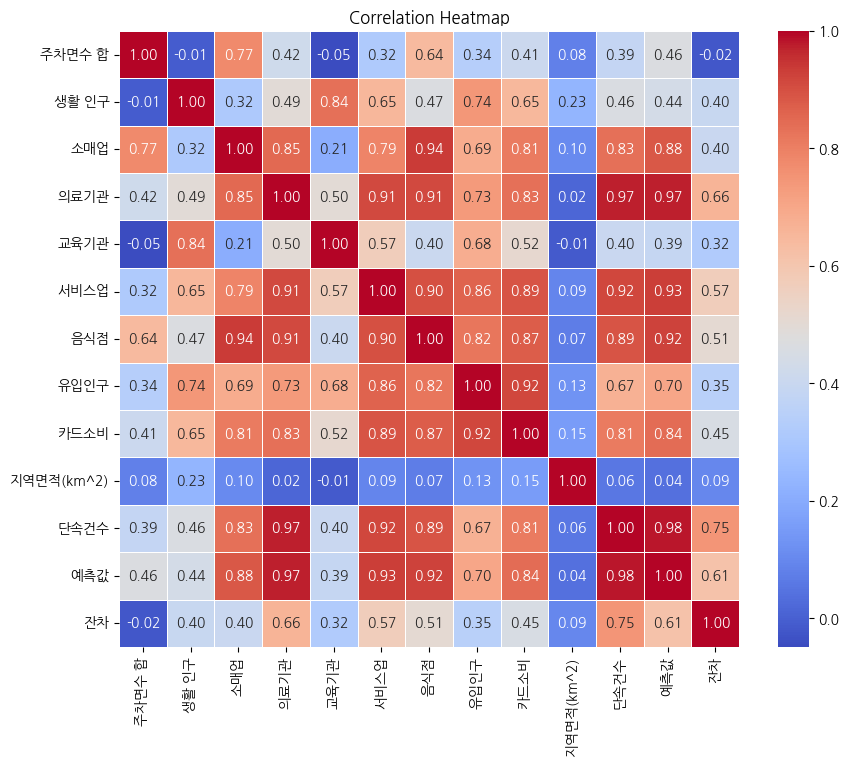

In [137]:
plt.figure(figsize=(10, 8))  # 그래프 크기 조정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

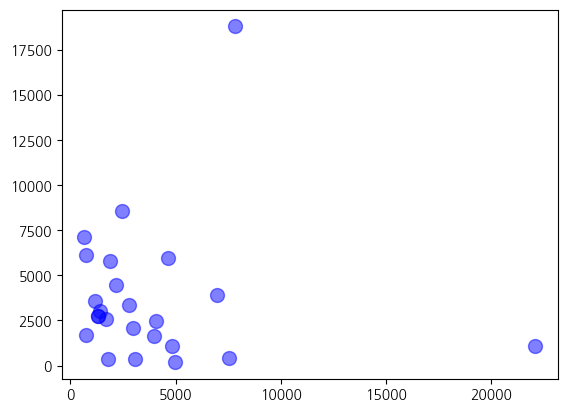

In [139]:
plt.plot('주차면수 합',
         '잔차',
         data=demand_hotspots,
        linestyle='none',
        marker='o',
        markersize=10,
        color='blue',
        alpha=0.5)

plt.show()